In [ ]:
import pandas as pd
import numpy as np
import re
!pip install pyforest
!pip install pandas

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=39cf34cb7dc9e4428339339e0c8e7291aeb2cfa6b5838ab0cd464ef12b1ff790
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/wildandr/https---github.com-wildandr-SipalingDatav2/main/train_modified.csv")

In [ ]:
data

,datetime,datetime_iso,time-zone,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds,sea_level,grnd_level,rain_3h,snow_1h,snow_3h,visibility
0,2.839968e+08,1979-01-01 00:00:00+00:00,28800.0,24.75,23.89,25.76,24.28,25.22,1012.0,95.0,0.82,320.0,0.00,100.0,undetermined,NaN,0,NaN,NaN,NaN
1,2.840004e+08,1979-01-01 01:00:00+00:00,28800.0,24.58,23.73,25.57,23.99,25.26,1012.0,95.0,0.96,338.0,0.00,100.0,NaN,NaN,0,0,0,NaN
2,2.840040e+08,1979-01-01 02:00:00+00:00,28800.0,26.60,24.06,26.60,26.10,27.39,1012.0,86.0,1.22,339.0,0.00,99.0,NaN,undetermined,volume:zero,NaN,NaN,unidentified
3,2.840076e+08,1979-01-01 03:00:00+00:00,28800.0,27.31,24.37,30.90,26.59,28.36,1012.0,84.0,1.08,342.0,0.13,94.0,NaN,undetermined,nol,0,NaN,NaN
4,2.840112e+08,1979-01-01 04:00:00+00:00,28800.0,27.41,25.05,31.54,26.58,28.31,1011.0,87.0,0.86,336.0,0.34,100.0,NaN,undetermined,nol,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341875,1.514747e+09,2017-12-31 19:00:00+00:00,28800.0,25.06,24.55,NaN,24.44,25.69,1007.0,97.0,0.90,13.0,0.00,99.0,undetermined,NaN,0,0,0,NaN
341876,1.514750e+09,2017-12-31 20:00:00+00:00,28800.0,24.51,24.17,25.58,23.89,25.13,1006.0,98.0,0.85,21.0,NaN,100.0,undetermined,undetermined,NaN,NaN,0,NaN
341877,1.514754e+09,2017-12-31 21:00:00+00:00,28800.0,24.63,24.29,NaN,24.00,NaN,1007.0,98.0,1.54,26.0,0.00,97.0,NaN,undetermined,NaN,0,no_snow,NaN
341878,1.514758e+09,2017-12-31 22:00:00+00:00,28800.0,26.68,24.71,29.76,25.02,27.25,1008.0,NaN,1.46,17.0,0.30,98.0,undetermined,NaN,0,0,volume:0,NaN


In [ ]:
data.isnull().sum()

datetime             0
datetime_iso         0
time-zone            0
temp              5557
d_point           9441
feels             5128
min_temp          5219
max_temp          5854
prssr             9888
hum              47673
wind_spd         14147
wind_deg          4235
rain_1h          74247
clouds           40927
sea_level       148916
grnd_level      148961
rain_3h         149551
snow_1h         149184
snow_3h         149181
visibility      290768
dtype: int64

In [ ]:
numerical_columns = data.select_dtypes(include=[np.number])
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = data.copy()
df_no_outliers[numerical_columns.columns] = numerical_columns[(numerical_columns >= lower_bound) & (numerical_columns <= upper_bound)]

In [ ]:
# Input nilai dengan interpolasi linear
df_no_outliers.fillna(method='pad', inplace=True)

In [ ]:
# Drop kolom-kolom tertentu
kolom_drop = ['sea_level', 'grnd_level', 'rain_3h', 'snow_1h', 'snow_3h', 'visibility']
df_preprocessed = df_no_outliers.drop(columns=kolom_drop)

In [ ]:
# cek missing value
df_preprocessed.isnull().sum()

datetime        0
datetime_iso    0
time-zone       0
temp            0
d_point         0
feels           0
min_temp        0
max_temp        0
prssr           0
hum             0
wind_spd        0
wind_deg        0
rain_1h         0
clouds          0
dtype: int64

In [ ]:
!pip install sweetviz


In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(df_preprocessed)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



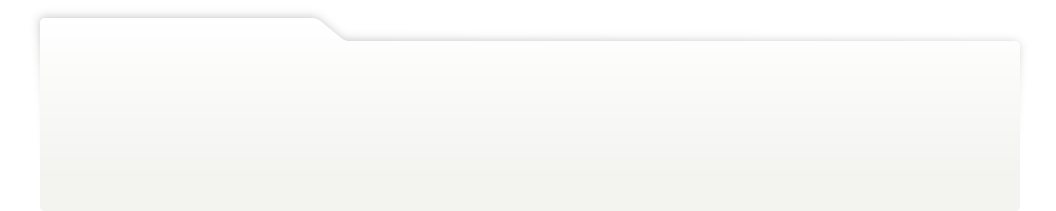
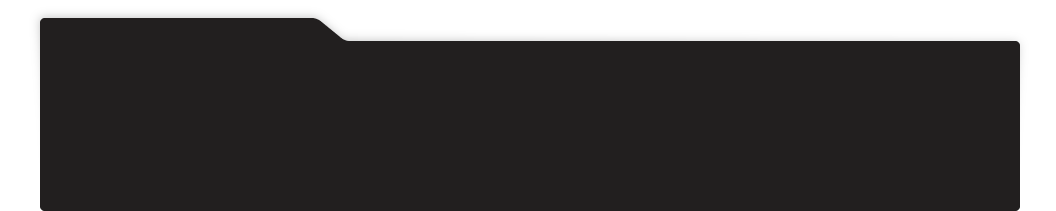
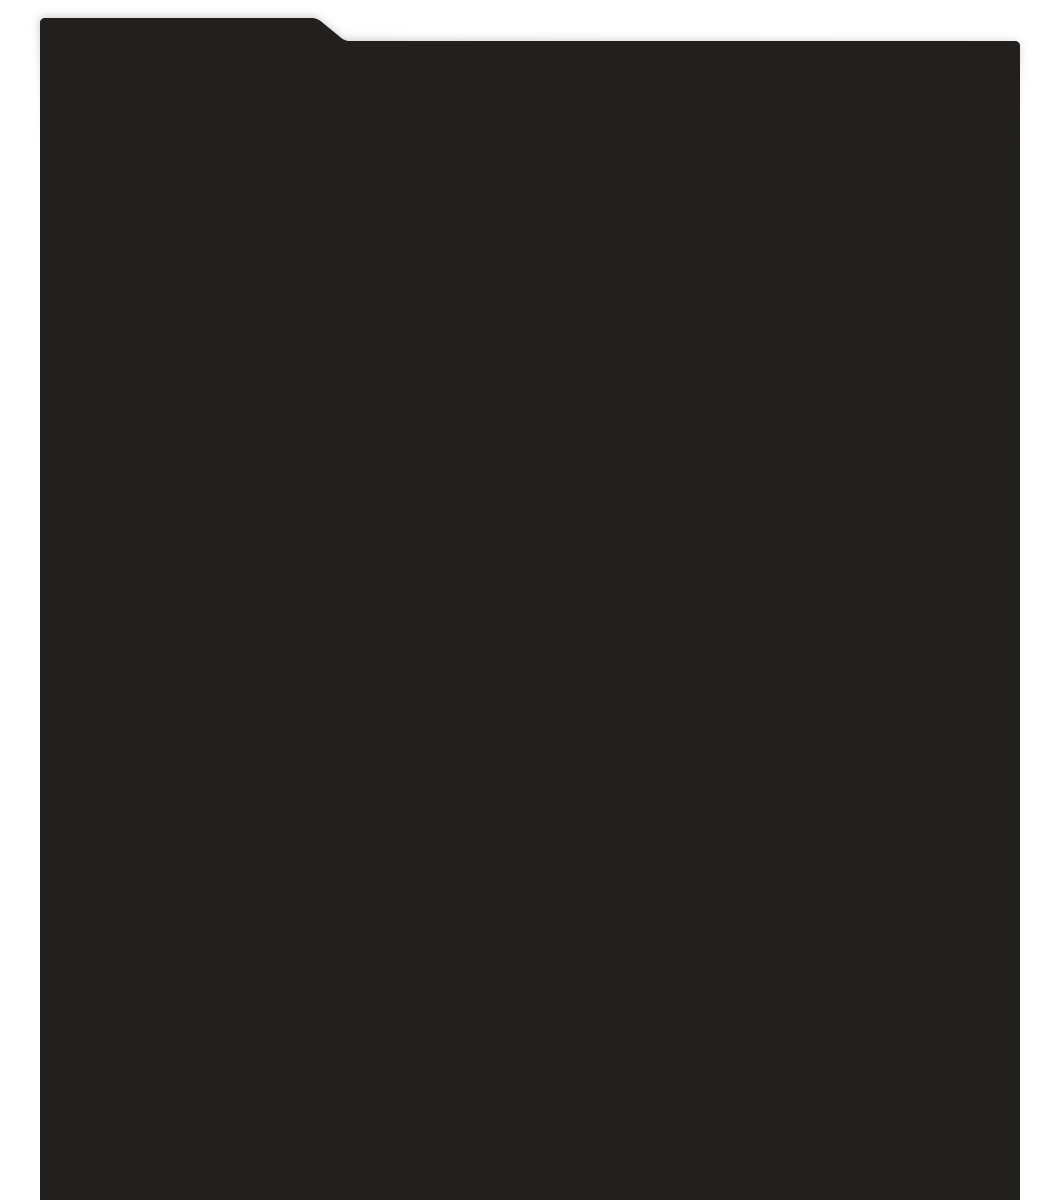
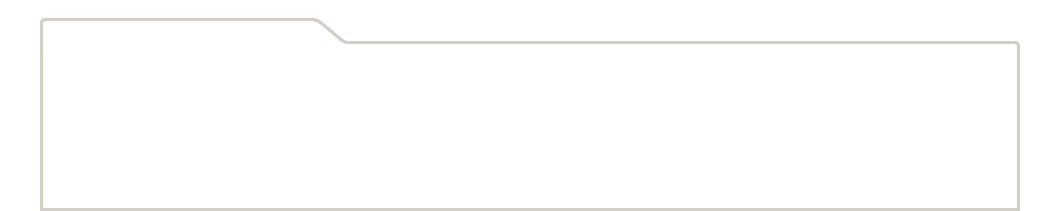
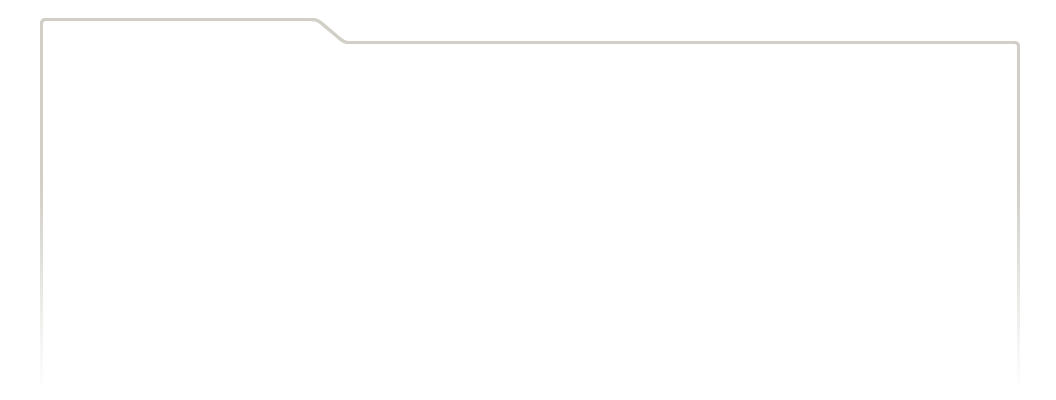
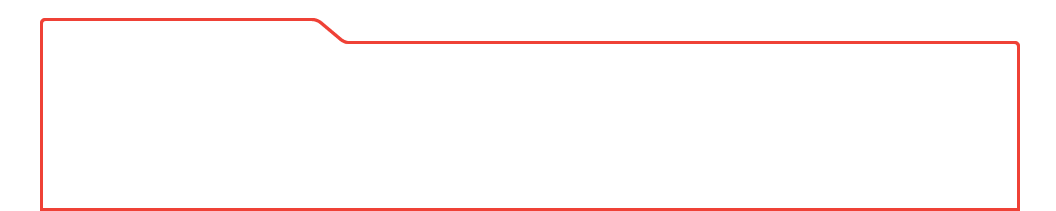
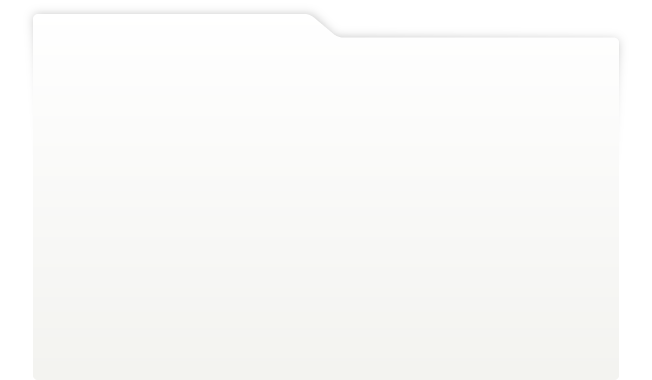
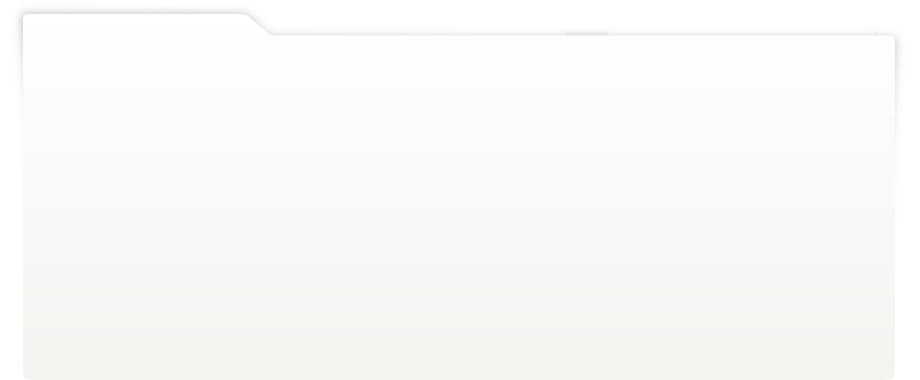
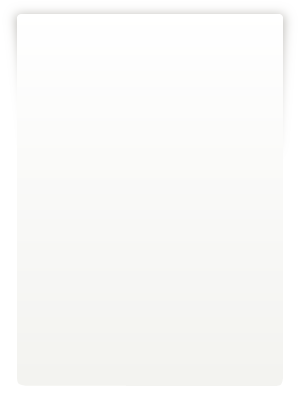
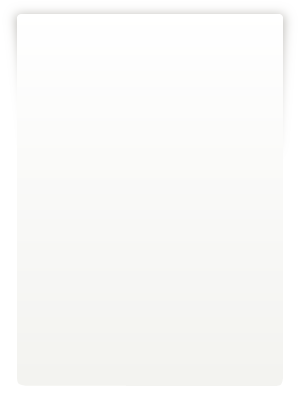
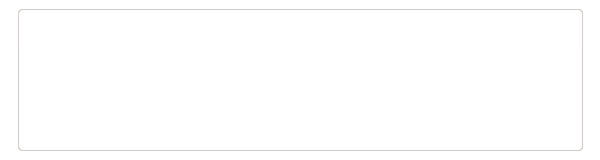
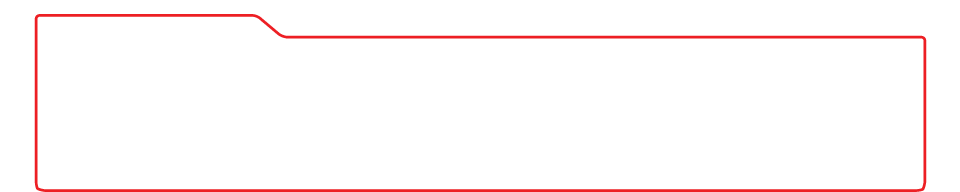
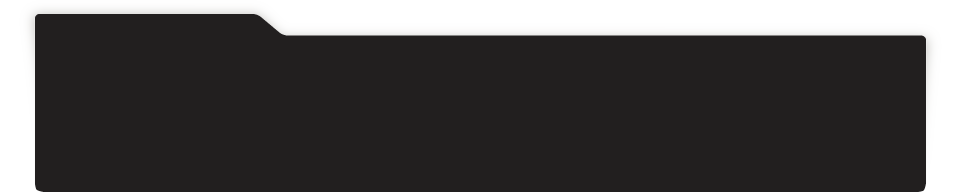
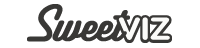
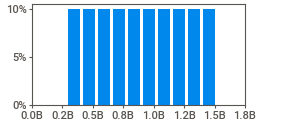
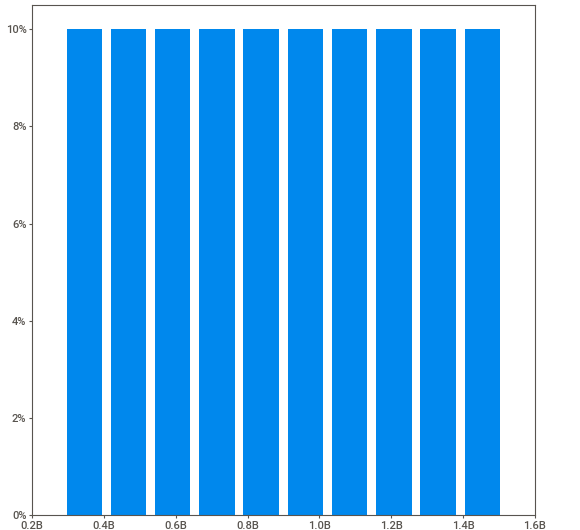
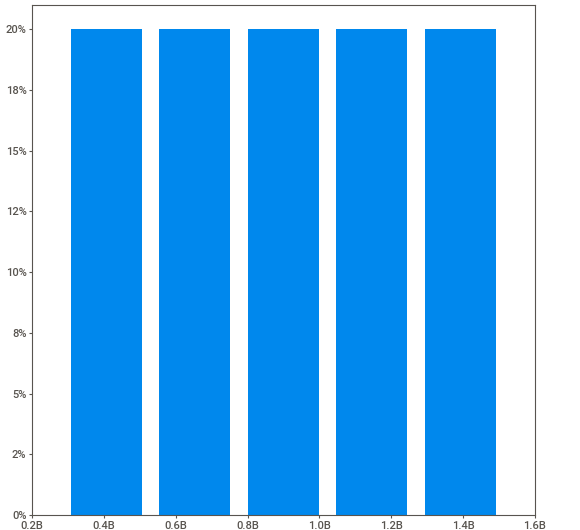
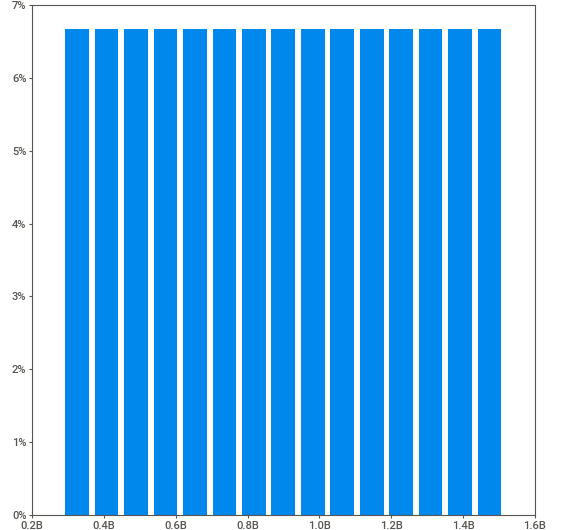
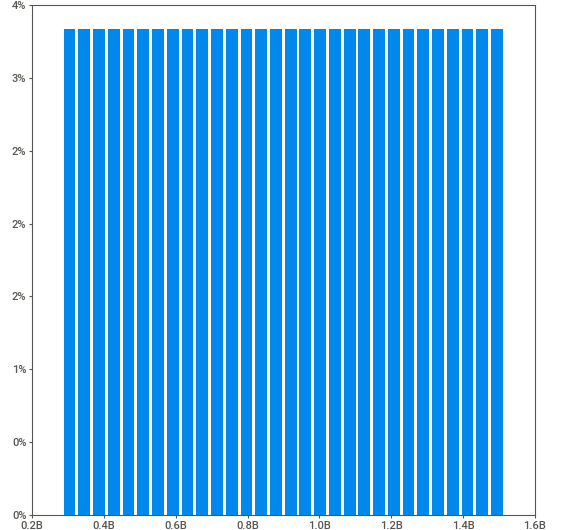
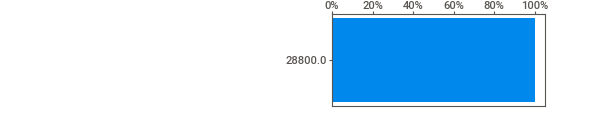
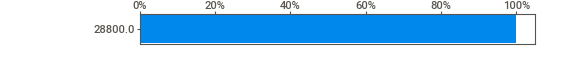
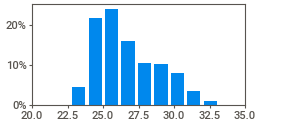
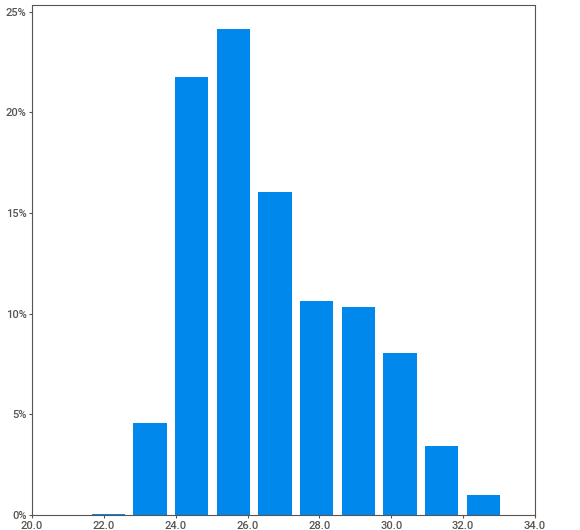
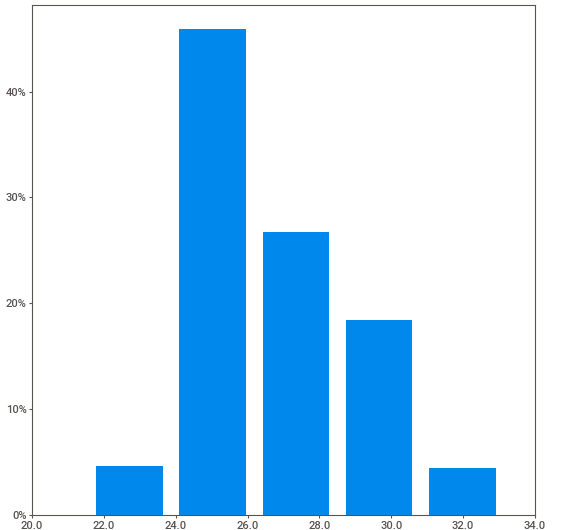
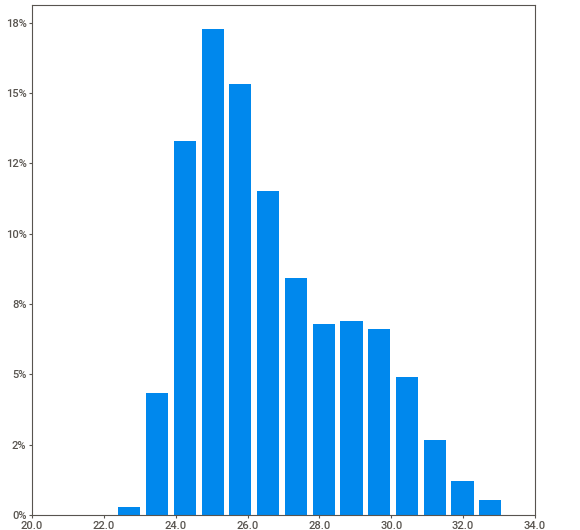
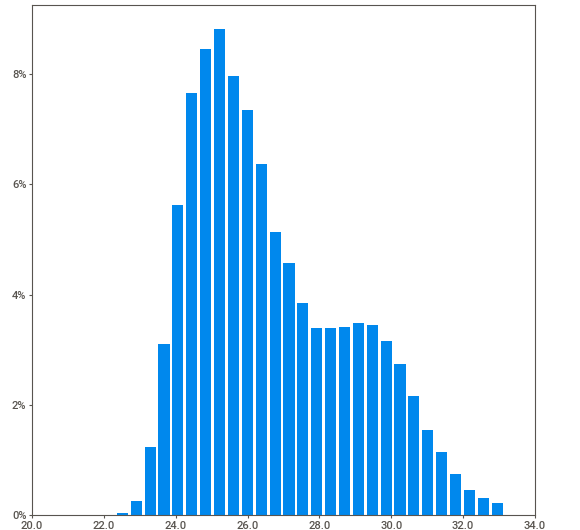
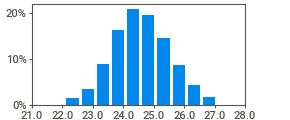
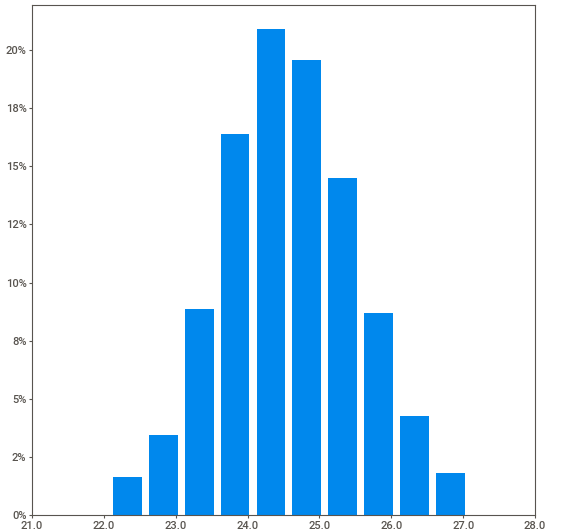
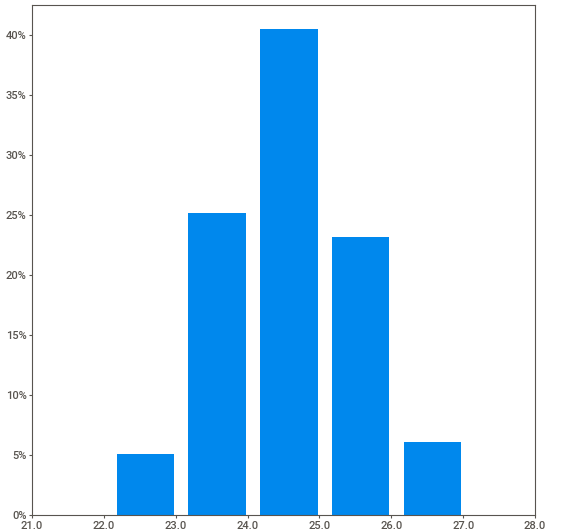
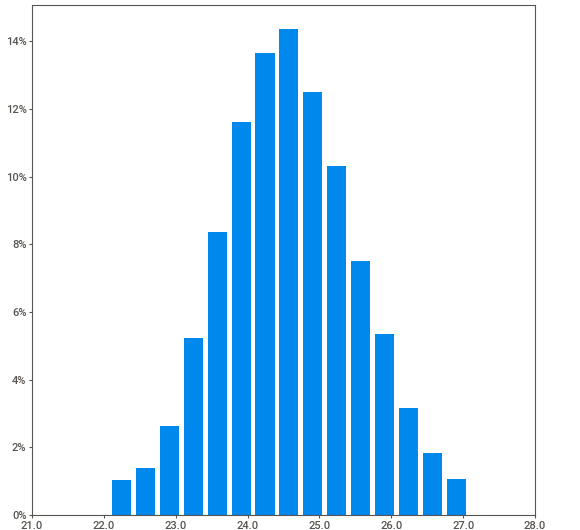
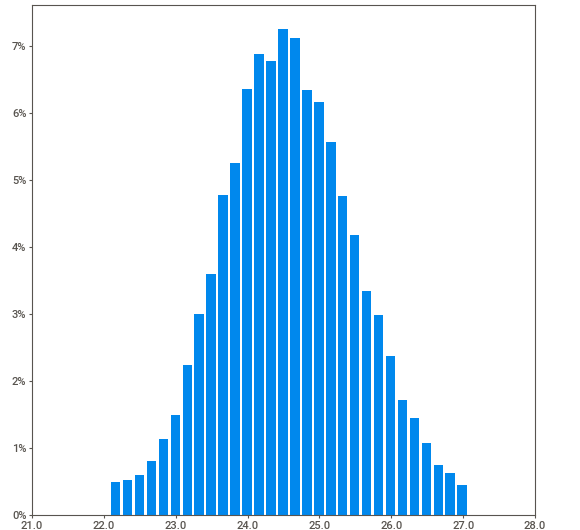
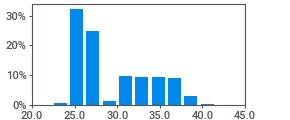
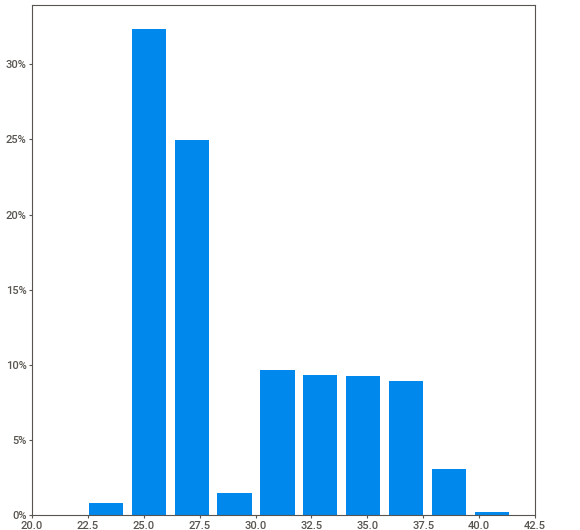
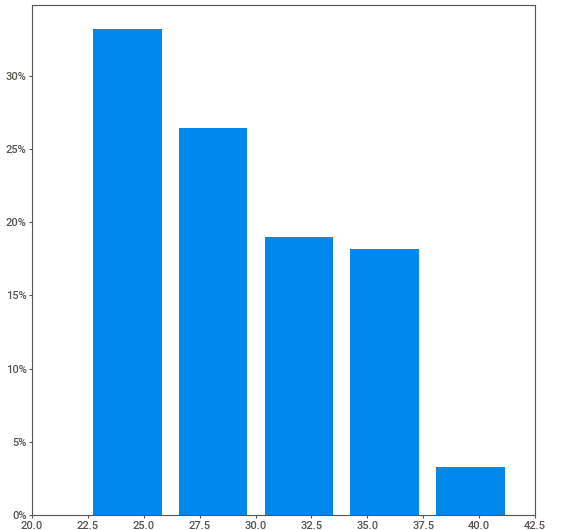
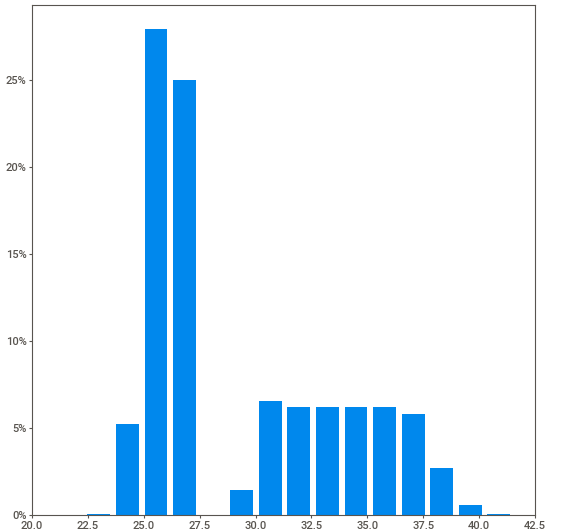
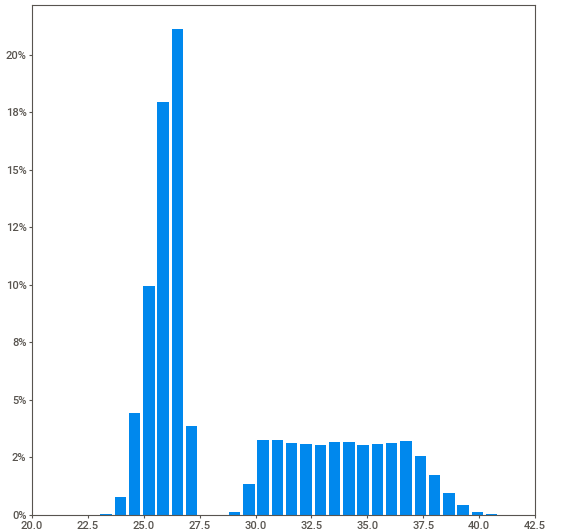
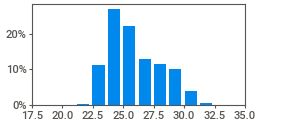
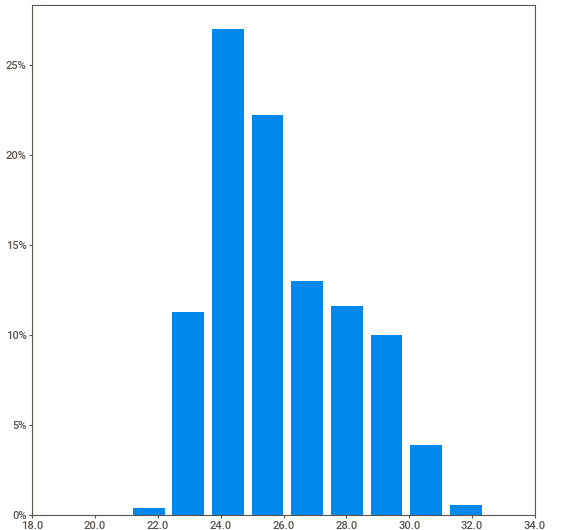
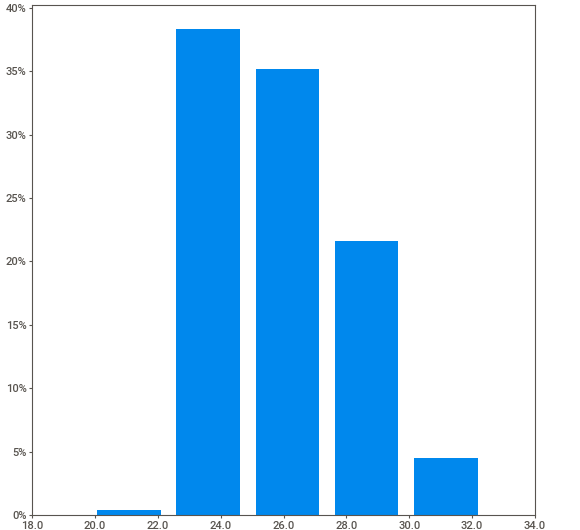
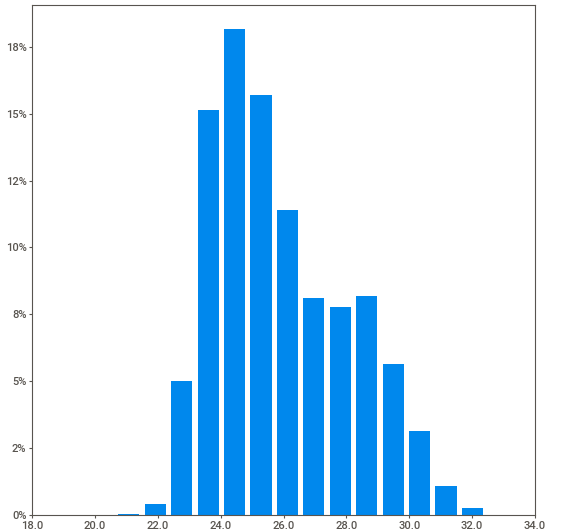
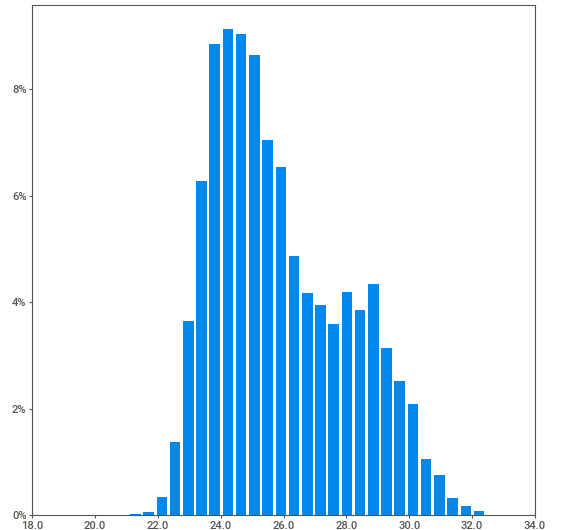
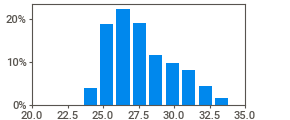
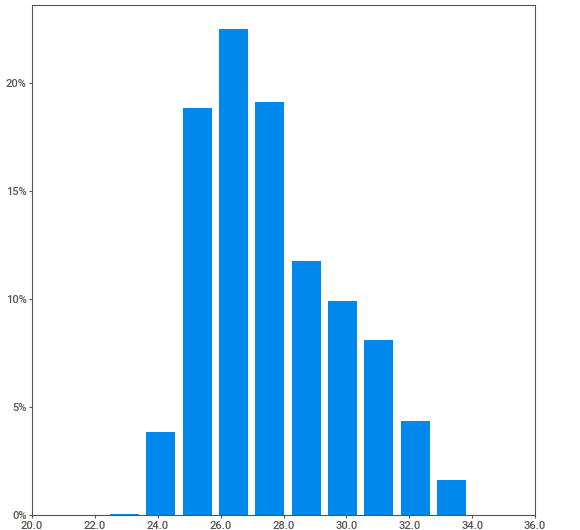
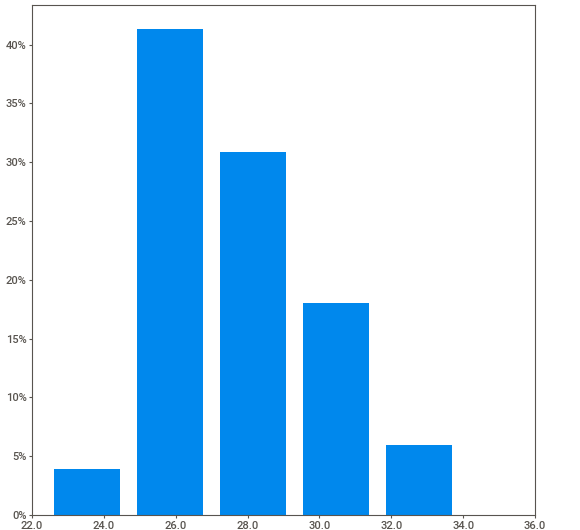
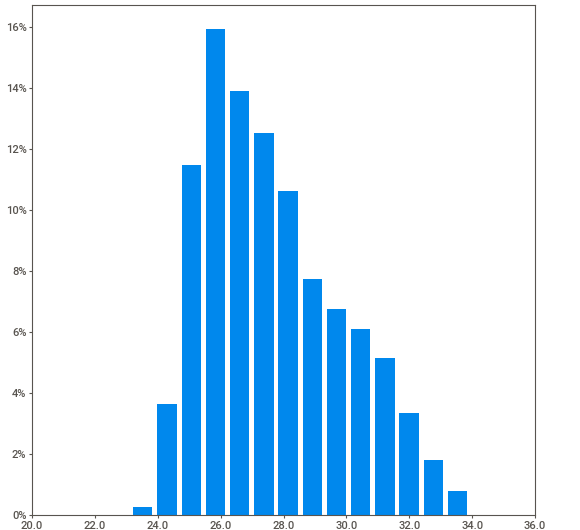
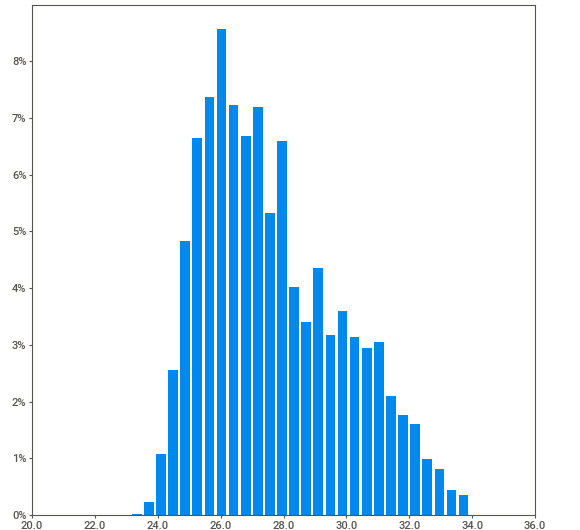
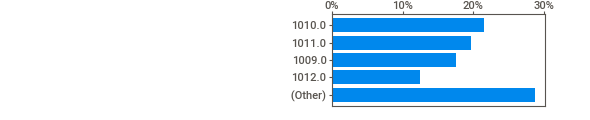
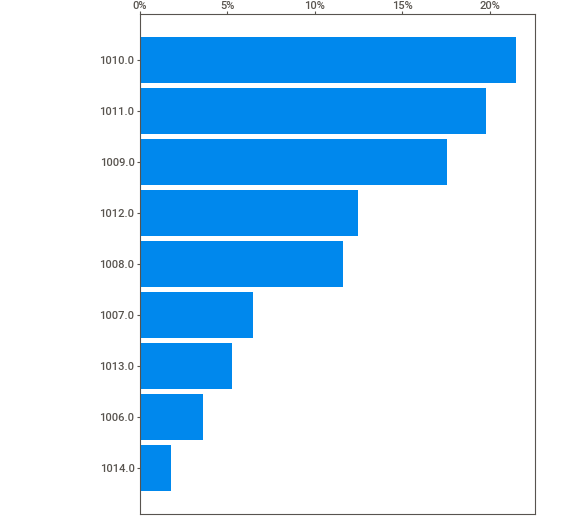
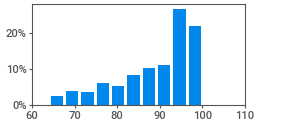
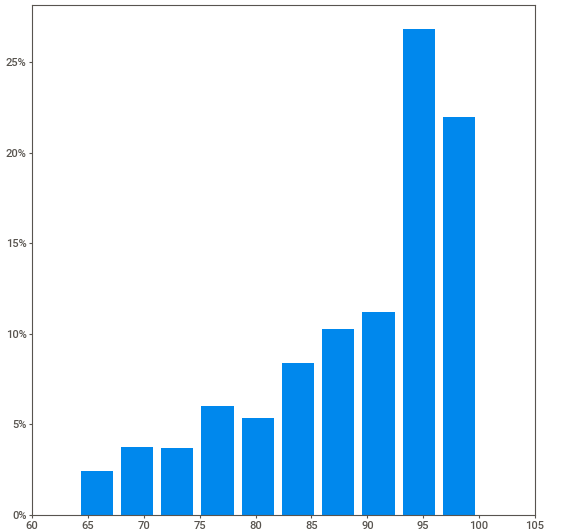
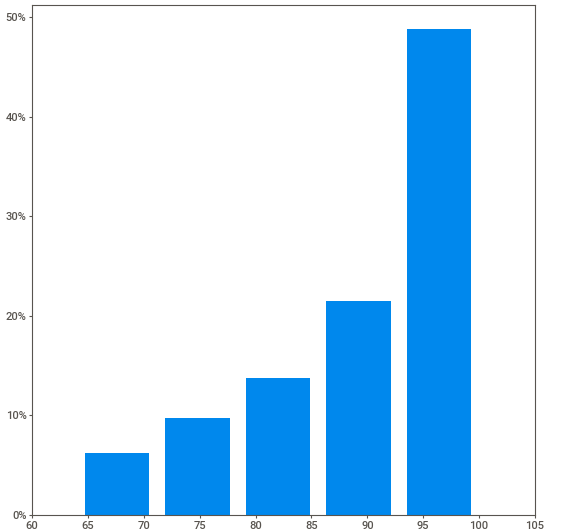
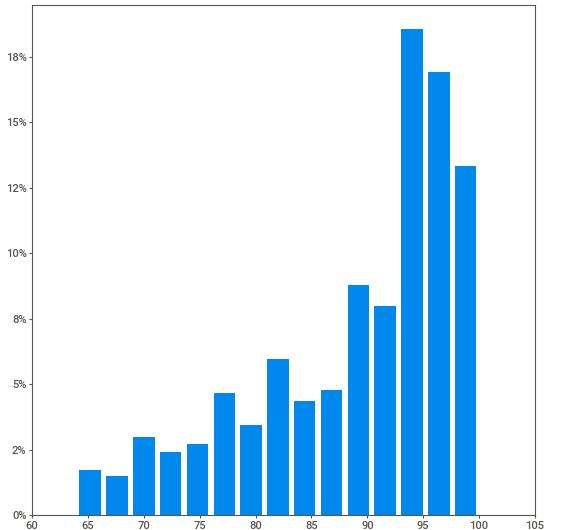
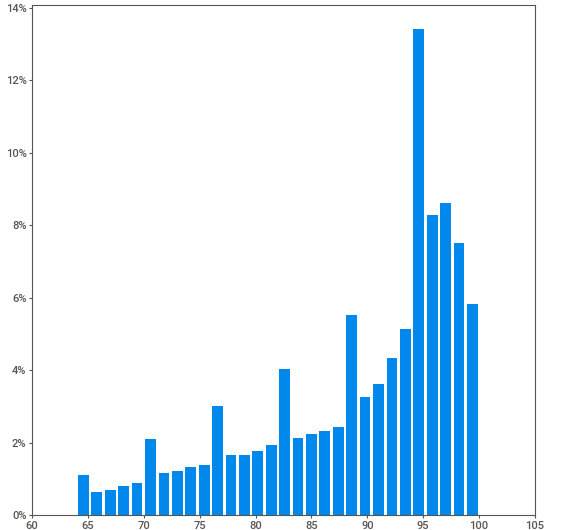
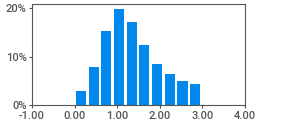
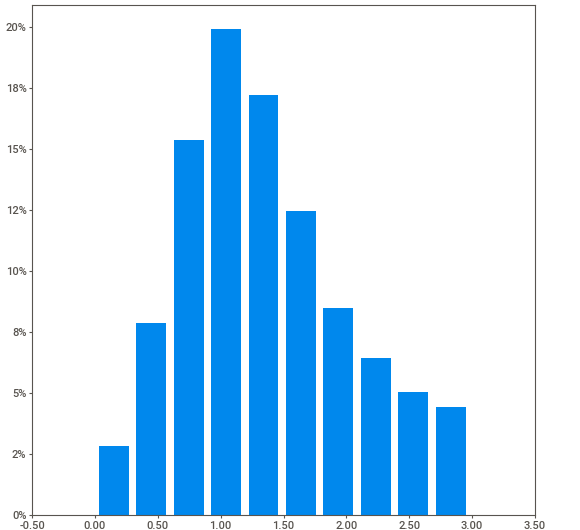
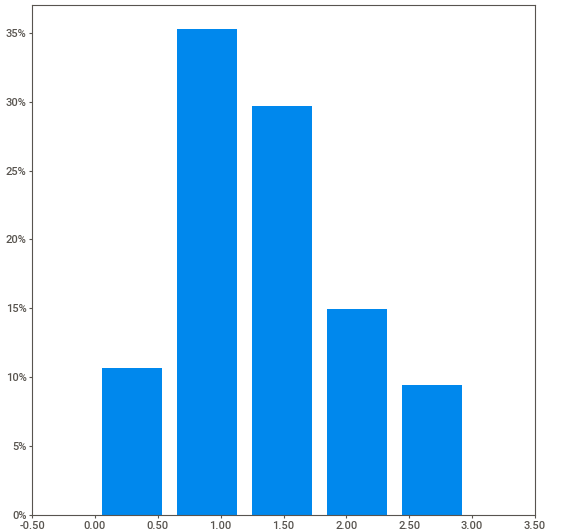
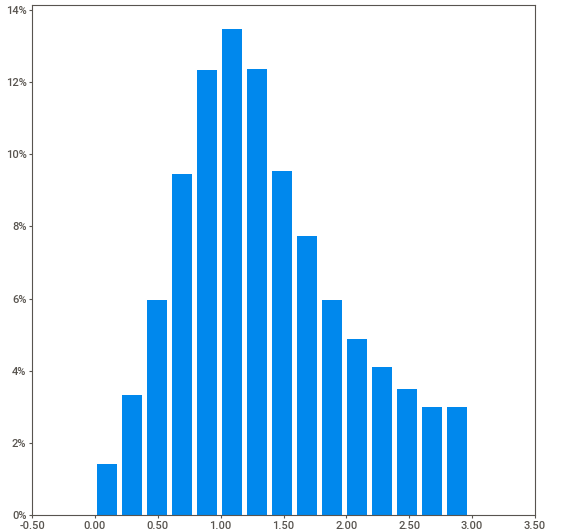
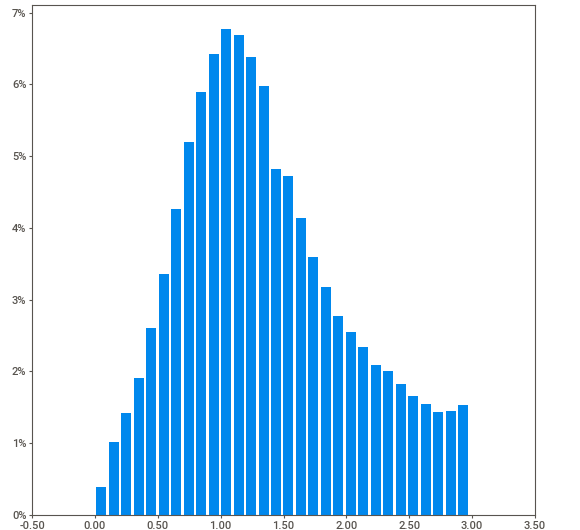
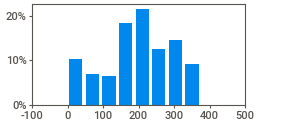
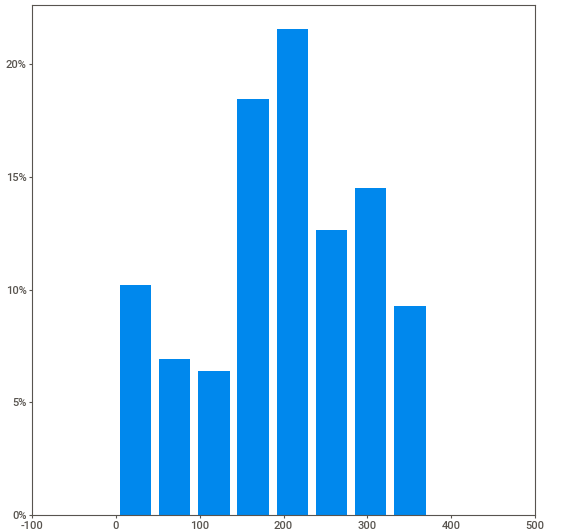
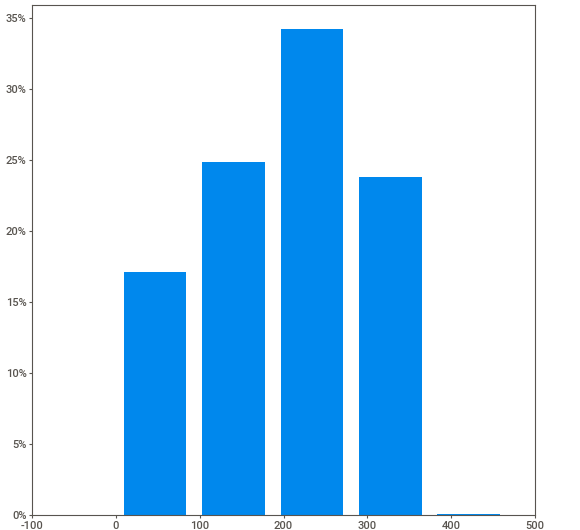
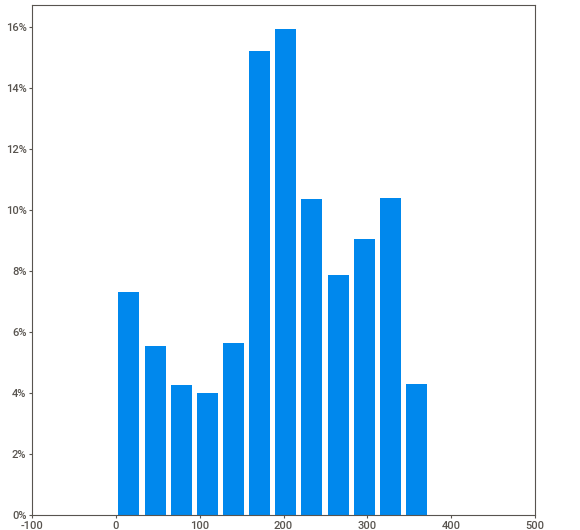
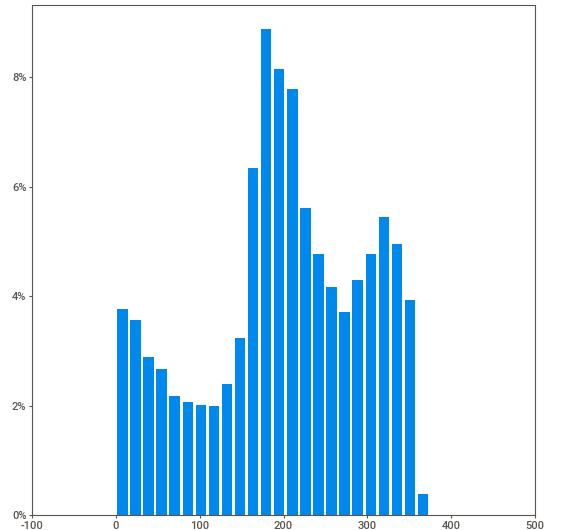
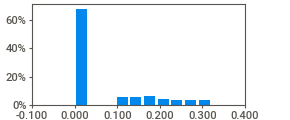
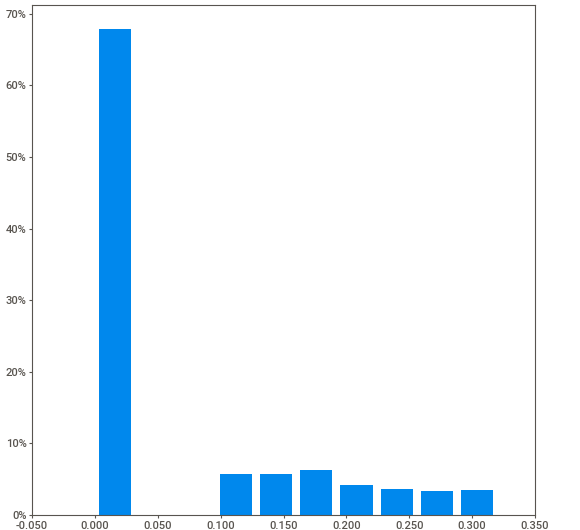
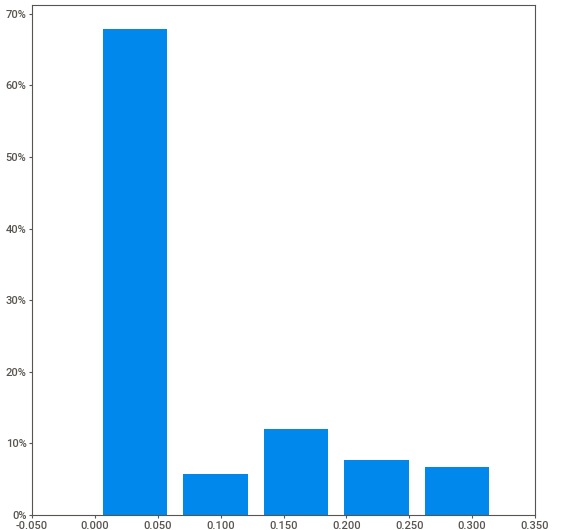
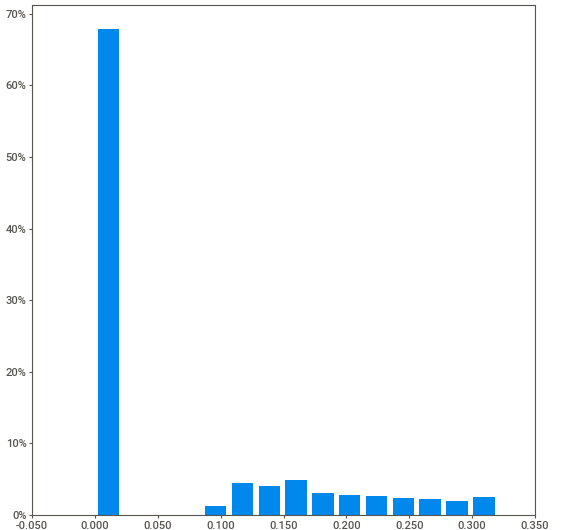
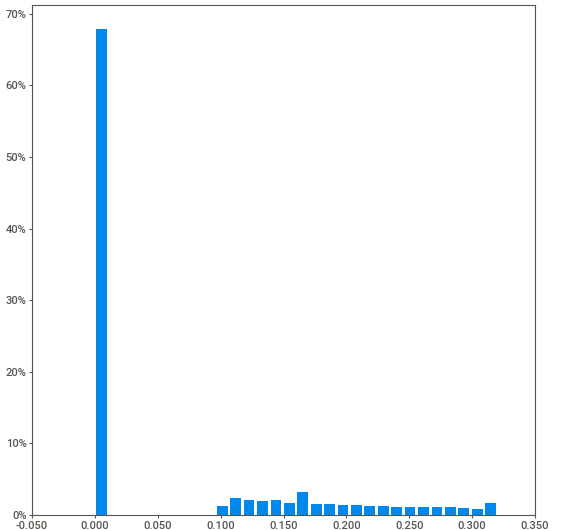
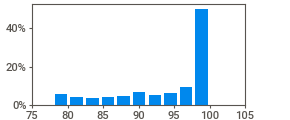
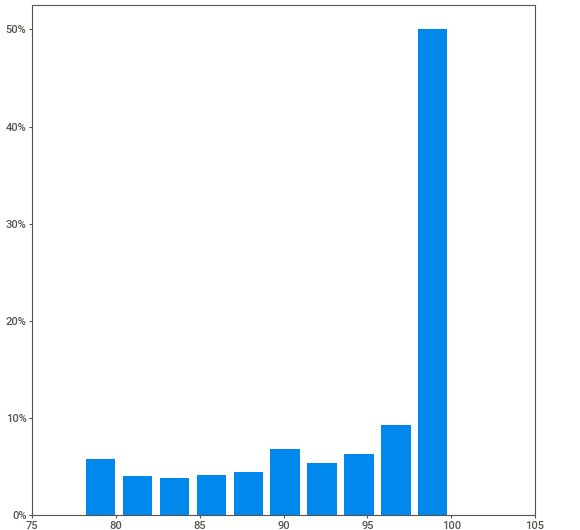
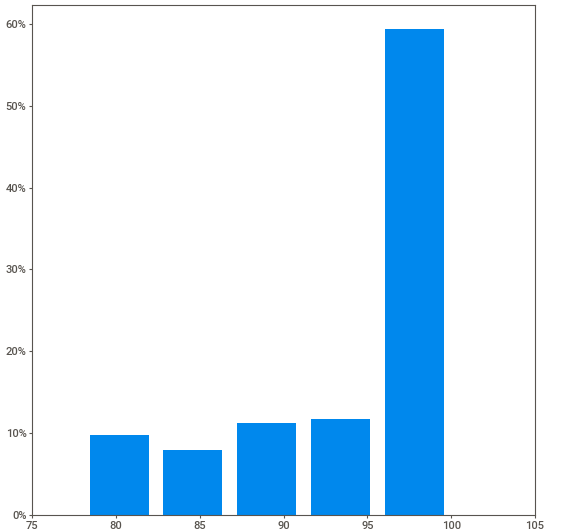
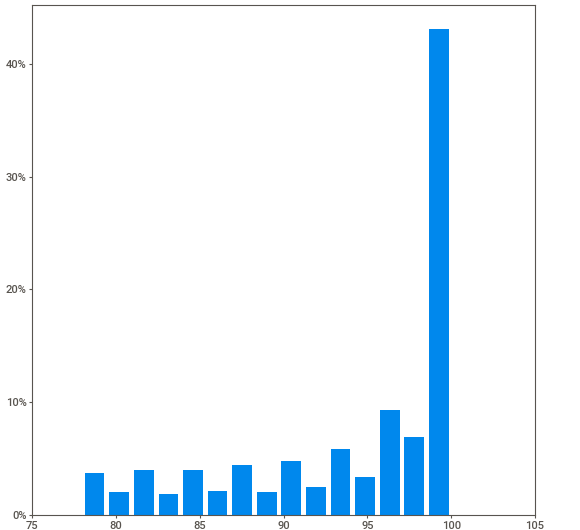
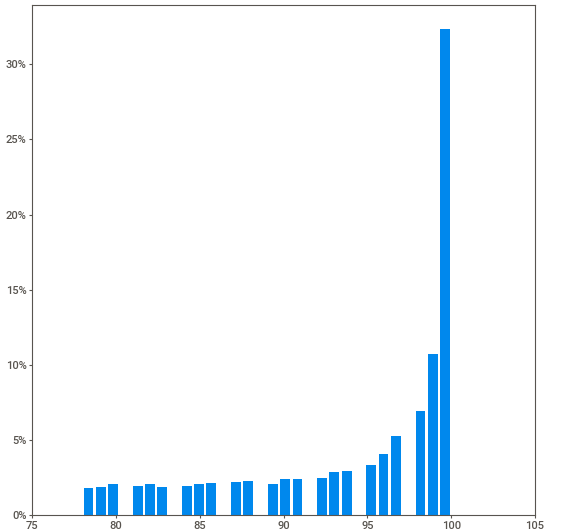
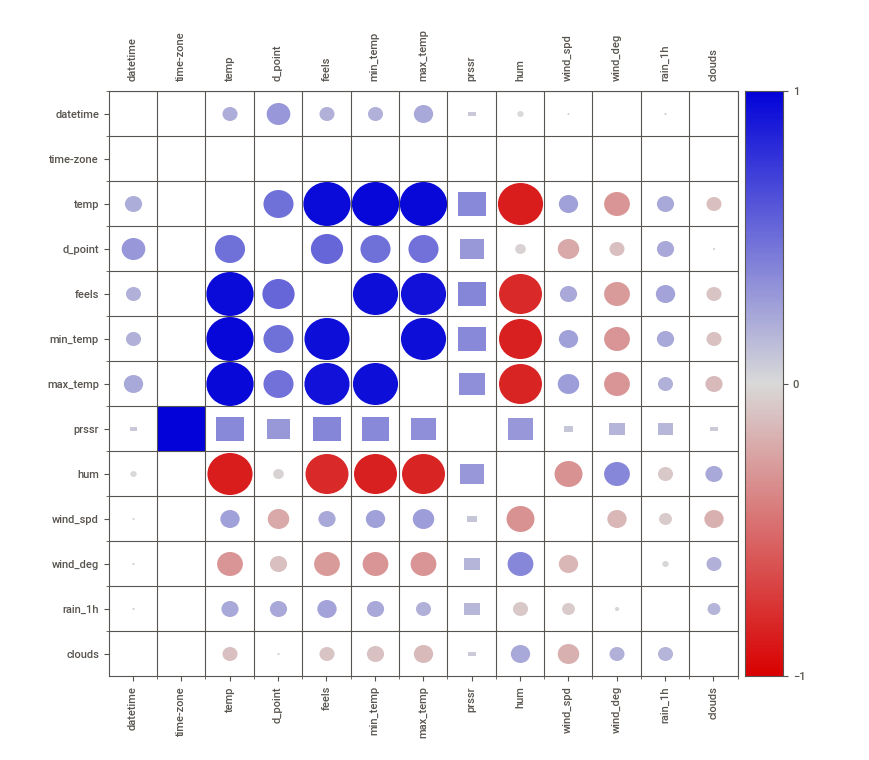
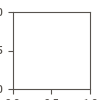

In [ ]:
import IPython
IPython.display.HTML('analyze.html')

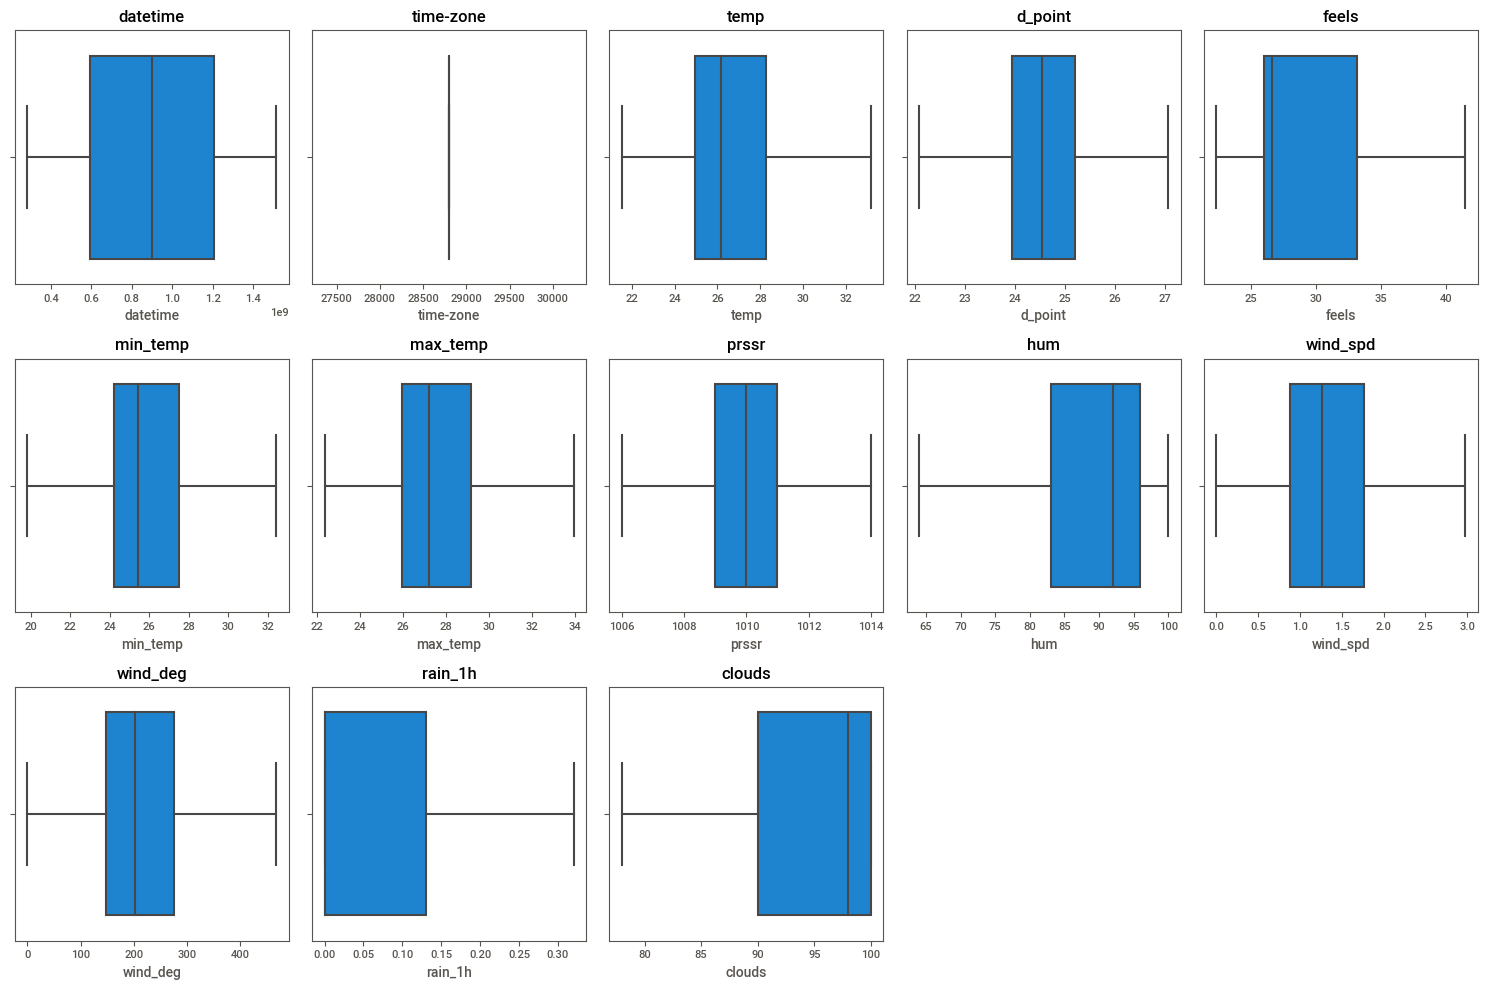

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# milih kolom-kolom numerik
numerical_columns = df_preprocessed.select_dtypes(include=[np.number])

# Membuat boxplot untuk setiap variabel numerik
plt.figure(figsize=(15, 10))  # Atur ukuran plot

# Loop melalui setiap kolom dan membuat boxplot
for column in numerical_columns.columns:
    plt.subplot(3, 5, numerical_columns.columns.get_loc(column) + 1)  # Mengatur letak subplot
    sns.boxplot(x=numerical_columns[column])
    plt.title(column)

plt.tight_layout()
plt.show()


<ipython-input-33-64e948d8b760>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


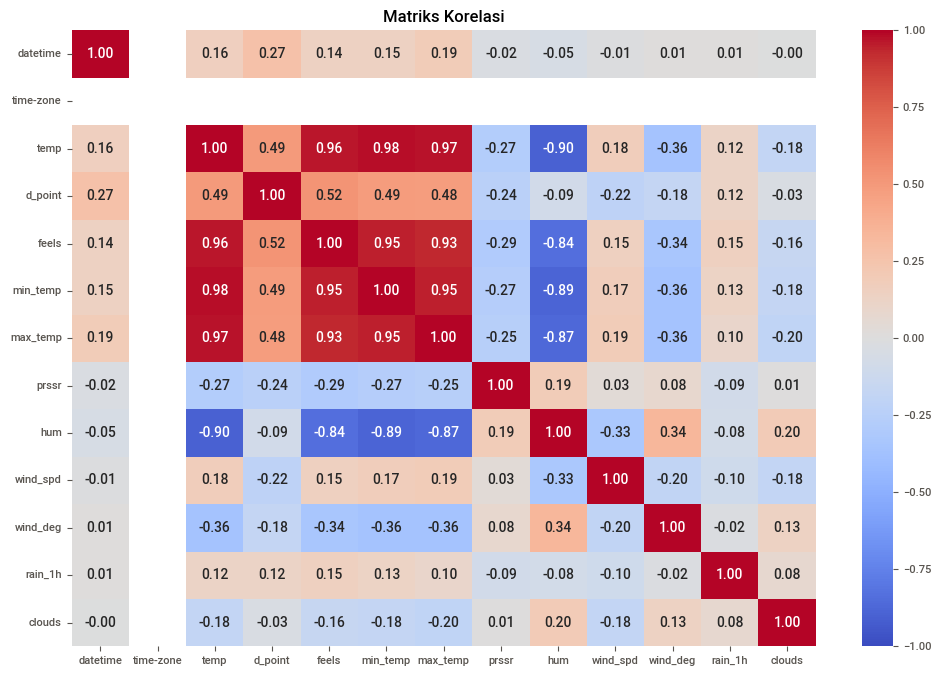

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi
corr_matrix = data.corr()

# Buat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriks Korelasi")
plt.show()


In [ ]:
# Periksa apakah ada NaN di dalam data
nan_counts = df_preprocessed.isna().sum()

# Tampilkan kolom-kolom yang memiliki nilai NaN
columns_with_nan = nan_counts[nan_counts > 0]

# Tampilkan jumlah NaN di setiap kolom
print("Jumlah NaN di setiap kolom:")
print(nan_counts)


Jumlah NaN di setiap kolom:
datetime        0
datetime_iso    0
time-zone       0
temp            0
d_point         0
feels           0
min_temp        0
max_temp        0
prssr           0
hum             0
wind_spd        0
wind_deg        0
rain_1h         0
clouds          0
dtype: int64


Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Pilih kolom fitur
features = ['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'clouds']
X = df_preprocessed[features].values

# kolom yang akan diprediksi (target)
target = 'rain_1h'
y = df_preprocessed[target].values

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np

# Periksa apakah ada NaN di dalam X_train
nan_indices_X_train = np.argwhere(np.isnan(X_train))
nan_count_X_train = len(nan_indices_X_train)

# Periksa apakah ada NaN di dalam X_test
nan_indices_X_test = np.argwhere(np.isnan(X_test))
nan_count_X_test = len(nan_indices_X_test)

# Periksa apakah ada NaN di dalam y_train
nan_indices_y_train = np.argwhere(np.isnan(y_train))
nan_count_y_train = len(nan_indices_y_train)

# Periksa apakah ada NaN di dalam y_test
nan_indices_y_test = np.argwhere(np.isnan(y_test))
nan_count_y_test = len(nan_indices_y_test)

print(f'Jumlah NaN di X_train: {nan_count_X_train}')
print(f'Jumlah NaN di X_test: {nan_count_X_test}')
print(f'Jumlah NaN di y_train: {nan_count_y_train}')
print(f'Jumlah NaN di y_test: {nan_count_y_test}')


Jumlah NaN di X_train: 0
Jumlah NaN di X_test: 0
Jumlah NaN di y_train: 0
Jumlah NaN di y_test: 0


In [ ]:
# Normalisasi data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Bentuk ulang data untuk format input LSTM (jumlah sampel, jumlah waktu, jumlah fitur)
timesteps = 1  # Sesuaikan sesuai dengan jumlah waktu yang ingin digunakan
X_train = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

Epoch 1/50
8547/8547 - 49s - loss: 0.0085 - val_loss: 0.0084 - 49s/epoch - 6ms/step
Epoch 2/50
8547/8547 - 42s - loss: 0.0083 - val_loss: 0.0083 - 42s/epoch - 5ms/step
Epoch 3/50
8547/8547 - 41s - loss: 0.0083 - val_loss: 0.0084 - 41s/epoch - 5ms/step
Epoch 4/50
8547/8547 - 46s - loss: 0.0082 - val_loss: 0.0083 - 46s/epoch - 5ms/step
Epoch 5/50
8547/8547 - 41s - loss: 0.0082 - val_loss: 0.0083 - 41s/epoch - 5ms/step
Epoch 6/50
8547/8547 - 42s - loss: 0.0082 - val_loss: 0.0082 - 42s/epoch - 5ms/step
Epoch 7/50
8547/8547 - 43s - loss: 0.0082 - val_loss: 0.0082 - 43s/epoch - 5ms/step
Epoch 8/50
8547/8547 - 43s - loss: 0.0082 - val_loss: 0.0082 - 43s/epoch - 5ms/step
Epoch 9/50
8547/8547 - 42s - loss: 0.0081 - val_loss: 0.0082 - 42s/epoch - 5ms/step
Epoch 10/50
8547/8547 - 40s - loss: 0.0081 - val_loss: 0.0082 - 40s/epoch - 5ms/step
Epoch 11/50
8547/8547 - 41s - loss: 0.0081 - val_loss: 0.0082 - 41s/epoch - 5ms/step
Epoch 12/50
8547/8547 - 40s - loss: 0.0081 - val_loss: 0.0082 - 40s/epoch 

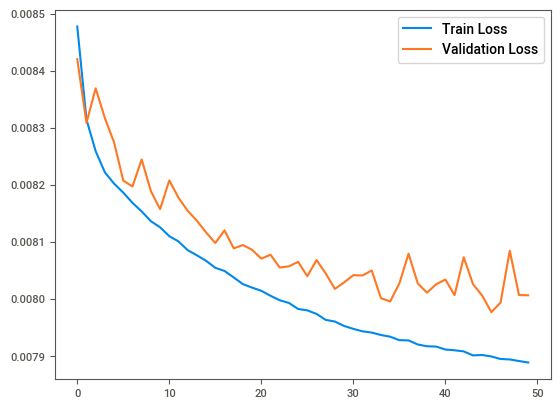

In [ ]:

# Inisialisasi model LSTM
model = Sequential()

# Tambahkan layer LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Layer output

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluasi model
loss = model.evaluate(X_test, y_test)

# Prediksi dengan model
predictions = model.predict(X_test)

# Plot loss pada setiap epoch
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hitung prediksi
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')


2137/2137 [==============================] - 7s 3ms/step
Mean Absolute Error (MAE): 0.06873727980886073
Mean Squared Error (MSE): 0.008006796724800988
Root Mean Squared Error (RMSE): 0.08948070588010014
R-squared (R2) Score: 0.15644790887472826


ini di bawah gx penting gausa diliat yh

In [ ]:
# df_preprocessed = df_no_outliers.fillna(method='ffill')
# df_preprocessed[numerical_columns.columns] = (df_preprocessed[numerical_columns.columns] + df_preprocessed[numerical_columns.columns].shift(-1)) / 2

In [ ]:
# # Konversi kolom-kolom ke numerik
# numeric_columns = ['temp', 'd_point', 'feels', 'min_temp', 'max_temp', 'prssr', 'hum', 'wind_spd', 'wind_deg', 'rain_1h', 'clouds']
# data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# # Imputasi nilai dengan interpolasi linear
# data.fillna(method='pad', inplace=True)

# # Simpan data yang telah dimodifikasi
# data.to_csv('data_train_modified_processed.csv', index=False)  # Sesuaikan dengan nama file output Anda


In [ ]:
# # Membaca dataset dari file CSV
# df = pd.read_csv("/content/drive/MyDrive/aadata/data_train_modified_processed.csv")
# df